In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/DMML/Dataset/data.txt')
df.head()

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0


# Feature Scaling
Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units.
* Min-Max scaler

In [3]:
x = df.drop('Date', axis='columns')
x.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [4]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range=(0, 1))
new_x  = min_max.fit_transform(x)

In [5]:
new_x

array([[0.07142857, 0.5       , 0.39189189, 0.75378654],
       [0.07142857, 0.675     , 0.59459459, 1.        ],
       [0.07142857, 0.325     , 0.45945946, 0.51039098],
       [0.03571429, 0.475     , 1.        , 0.30750264],
       [0.03571429, 0.675     , 0.63513514, 0.74286721],
       [0.07142857, 0.3       , 0.35135135, 0.3694963 ],
       [0.07142857, 0.5       , 0.47297297, 0.63015146],
       [1.        , 0.35      , 0.44594595, 0.20500176],
       [0.        , 0.475     , 0.43243243, 0.        ],
       [0.07142857, 0.2       , 0.31081081, 0.26030292],
       [0.07142857, 0.325     , 0.62162162, 0.47270166],
       [0.07142857, 0.25      , 0.25675676, 0.19584361],
       [0.07142857, 0.25      , 0.25675676, 0.19584361],
       [0.07142857, 0.4       , 0.36486486, 0.52905953],
       [0.07142857, 0.35      , 0.41891892, 0.64882001],
       [0.07142857, 0.2       , 0.2972973 , 0.28143713],
       [0.07142857, 0.2       , 0.25675676, 0.07079958],
       [0.07142857, 0.25      ,

In [6]:
df1 = pd.DataFrame(new_x, columns=['Duration', 'Pulse', 'Maxpulse', 'Calories'])
df1.head()

,Duration,Pulse,Maxpulse,Calories
0,0.071429,0.500,0.391892,0.753787
1,0.071429,0.675,0.594595,1.000000
2,0.071429,0.325,0.459459,0.510391
3,0.035714,0.475,1.000000,0.307503
4,0.035714,0.675,0.635135,0.742867


In [7]:
dff = pd.read_csv('/content/drive/MyDrive/DMML/Codebasics/heart.csv')
dff.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
x = dff.drop('target', axis='columns')
y = dff['target']

In [10]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [11]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

# Feature Selection
Feature selection is a way of selecting the subset of the most relevant features from the original features set by removing the redundant, irrelevant, or noisy features.
* Chi-square
* Correlation coefficient

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [14]:
fit_f = SelectKBest(score_func=chi2)
fit_f.fit(x,y)

SelectKBest(score_func=<function chi2 at 0x7f85d6ebecb0>)

In [15]:
fit_f.scores_

array([ 23.28662399,   7.57683451,  62.59809791,  14.8239245 ,
        23.93639448,   0.20293368,   2.97827075, 188.32047169,
        38.91437697,  72.64425301,   9.8040952 ,  66.44076512,
         5.79185297])

In [18]:
df2 = pd.DataFrame(fit_f.scores_, index=x.columns, columns=['Score'])
df2

,Score
age,23.286624
sex,7.576835
cp,62.598098
trestbps,14.823925
chol,23.936394
fbs,0.202934
restecg,2.978271
thalach,188.320472
exang,38.914377
oldpeak,72.644253


In [21]:
df2.sort_values(by='Score', ascending=False)

,Score
thalach,188.320472
oldpeak,72.644253
ca,66.440765
cp,62.598098
exang,38.914377
chol,23.936394
age,23.286624
trestbps,14.823925
slope,9.804095
sex,7.576835


In [22]:
dff.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [23]:
import seaborn as sb
import matplotlib.pyplot as plt

In [24]:
corr = dff.corr()

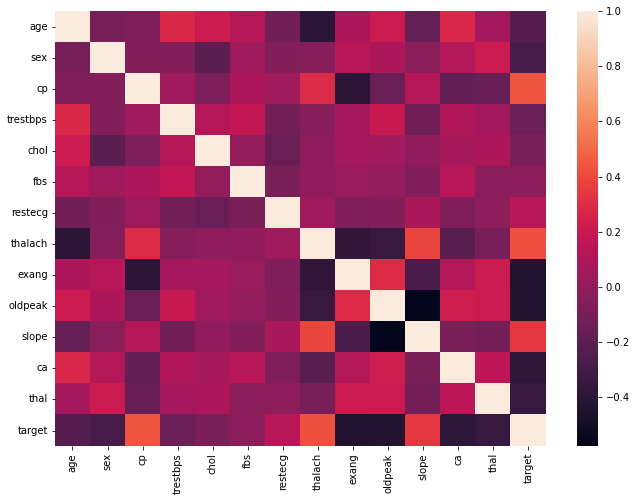

In [26]:
plt.figure(figsize=(11,8))
sb.heatmap(corr)